In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def federal_taxes(gross, status="single", ira=None):
    if gross > 113700:
        fica = (113700*0.124)/2.

    elif gross <= 113700:
        fica = (gross*0.124)/2.

    if status == "single":
        if gross > 200000:
            medicare = (gross*0.038)/2.

        elif gross <= 200000:
            medicare = (gross*0.029)/2.
            
    elif status == "married":
        if gross > 250000:
            medicare = (gross*0.038)/2.

        elif gross <= 250000:
            medicare = (gross*0.029)/2.

   
    if type(ira) != type(None):
        if ira == "calc":
            if status == "single":
                if 0.1*gross <= 5500:
                    ira = 0.1*gross
                else:
                    ira = 5500.
                
            elif status == "married":
                if 0.1*gross <= 11000:
                    ira = 0.1*gross
                else:
                    ira = 11000.            
        gross = gross - ira
        
    if status.lower() == "single":
        std_deduct = 6200
        exemption = 3950
        gross = gross - std_deduct - exemption 

        if gross <= 9075:
            return 0.1 * gross + fica + medicare

        elif (gross > 9075) & (gross <= 36900):
            return 907.5 + 0.15 * (gross - 9075) + fica + medicare

        elif (gross > 36900) & (gross <= 89350):
            return 5081.25 + 0.25 * (gross - 36900) + fica + medicare

        elif (gross > 89350) & (gross <= 186350):
            return 18193.75 + 0.28 * (gross - 89350) + fica + medicare

        elif (gross > 186350) & (gross <= 405100):
            return 45353.75 + 0.33 * (gross - 186350) + fica + medicare

        elif (gross > 405100) & (gross <= 406750):
            return 117541.25 + 0.35 * (gross - 405100) + fica + medicare

        elif gross > 406750:
            return 118118.75 + 0.369 * (gross - 406750) + fica + medicare

    elif status.lower() == "married":
        std_deduct = 12400
        exemption = 7900
        gross = gross - std_deduct - exemption

        if gross <= 18150:
            return 0.1 * gross + fica + medicare

        elif (gross > 18150) & (gross <= 73800):
            return 1815 + 0.15 * (gross - 18150) + fica + medicare

        elif (gross > 73800) & (gross <= 148850):
            return 10162.50 + 0.25 * (gross - 73800) + fica + medicare

        elif (gross > 148850) & (gross <= 226850):
            return 28925 + 0.28 * (gross - 148850) + fica + medicare

        elif (gross > 226850) & (gross <= 405100):
            return 50765 + 0.33 * (gross - 226850) + fica + medicare

        elif (gross > 405100) & (gross <= 457600):
            return 109587.50 + 0.35 * (gross - 405100) + fica + medicare

        elif gross > 457600:
            return 127962.50 + 0.369 * (gross - 457600) + fica + medicare
        

In [3]:
def nystate_taxes(gross, status="single", ira=None):
    if type(ira) != type(None):
        if ira == "calc":
            if status == "single":
                if 0.1*gross <= 5500:
                    ira = 0.1*gross
                else:
                    ira = 5500.
                
            elif status == "married":
                if 0.1*gross <= 11000:
                    ira = 0.1*gross
                else:
                    ira = 11000.            
        gross = gross - ira
    
    if status.lower() == "single":
        std_deduct = 7800
        gross = gross - std_deduct        

        if gross < 8300:
            return 0.04*gross

        elif (gross >= 8300) & (gross < 11450):
            return 0.04*8300 + 0.045*(gross - 8300)

        elif (gross >= 11450) & (gross < 13550):
            return 0.04*8300 + 0.045*(11450 - 8300) + 0.0525*(gross - 11450)

        elif (gross >= 13550) & (gross < 20850):
            return 0.04*8300 + 0.045*(11450 - 8300) + 0.0525*(13550 - 11450) + 0.059*(gross - 13550)

        elif (gross >= 20850) & (gross < 78400):
            return 0.04*8300 + 0.045*(11450 - 8300) + 0.0525*(13550 - 11450) + 0.059*(20850 - 13550) + 0.0645*(gross - 20850)

        elif (gross >= 78400) & (gross < 209250):
            return 0.04*8300 + 0.045*(11450 - 8300) + 0.0525*(13550 - 11450) + 0.059*(20850 - 13550) + 0.0645*(78400 - 20850) + 0.0665*(gross - 78400)

        elif (gross >= 209250) & (gross < 1046350):
            return 0.04*8300 + 0.045*(11450 - 8300) + 0.0525*(13550 - 11450) + 0.059*(20850 - 13550) + 0.0645*(78400 - 20850) + 0.0665*(209250 - 78400) + 0.0685*(gross - 209250)

        elif gross >= 1046350:
            return 0.04*8300 + 0.045*(11450 - 8300) + 0.0525*(13550 - 11450) + 0.059*(20850 - 13550) + 0.0645*(78400 - 20850) + 0.0665*(209250 - 78400) + 0.0685*(1046350 - 209250) + 0.0882*(gross - 1046350)


    elif status.lower() == "married":
        std_deduct = 15650
        gross = gross - std_deduct

        if gross < 16700:
            return 0.04*gross

        elif (gross >= 16700) & (gross < 22950):
            return 0.04*16700 + 0.045*(gross - 16700)

        elif (gross >= 22950) & (gross < 27150):
            return 0.04*16700 + 0.045*(22950 - 16700) + 0.0525*(gross - 22950)

        elif (gross >= 27150) & (gross < 41800):
            return 0.04*16700 + 0.045*(22950 - 16700) + 0.0525*(27150 - 22950) + 0.059*(gross - 27150)

        elif (gross >= 41800) & (gross < 156900):
            return 0.04*16700 + 0.045*(22950 - 16700) + 0.0525*(27150 - 22950) + 0.059*(41800 - 27150) + 0.0645*(gross - 41800)

        elif (gross >= 156900) & (gross < 313850):
            return 0.04*16700 + 0.045*(22950 - 16700) + 0.0525*(27150 - 22950) + 0.059*(41800 - 27150) + 0.0645*(156900 - 41800) + 0.0665*(gross - 156900)

        elif (gross >= 313850) & (gross < 2092800):
            return 0.04*16700 + 0.045*(22950 - 16700) + 0.0525*(27150 - 22950) + 0.059*(41800 - 27150) + 0.0645*(156900 - 41800) + 0.0665*(313850 - 156900) + 0.0685*(gross - 313850)

        elif gross >= 2092800:
            return 0.04*16700 + 0.045*(22950 - 16700) + 0.0525*(27150 - 22950) + 0.059*(41800 - 27150) + 0.0645*(156900 - 41800) + 0.0665*(313850 - 156900) + 0.0685*(2092800 - 313850) + 0.0882*(gross - 2092800)
        

In [4]:
def nycity_taxes(gross, status="single", ira=None):
    if type(ira) != type(None):
        if ira == "calc":
            if status == "single":
                if 0.1*gross <= 5500:
                    ira = 0.1*gross
                else:
                    ira = 5500.
                
            elif status == "married":
                if 0.1*gross <= 11000:
                    ira = 0.1*gross
                else:
                    ira = 11000.            
        gross = gross - ira
    
    if status.lower() == "single":

        if gross <= 12000:
            return 0.02907*gross

        elif (gross > 12000) & (gross <= 25000):
            return 349 + 0.03534*(gross - 12000)

        elif (gross > 25000) & (gross <= 50000):
            return 808 + 0.03591*(gross - 25000)

        elif (gross > 50000) & (gross <= 500000):
            return 1706 + 0.03648*(gross - 50000)

        elif gross > 500000:
            return 18122 + 0.03876*(gross - 500000)


    elif status.lower() == "married":

        if gross <= 21600:
            return 0.02907*gross

        elif (gross > 21600) & (gross <= 45000):
            return 628 + 0.03534*(gross - 21600)

        elif (gross > 45000) & (gross <= 90000):
            return 1455 + 0.03591*(gross - 45000)

        elif (gross > 90000) & (gross <= 500000):
            return 3071 + 0.03648*(gross - 90000)

        elif gross > 500000:
            return 18028 + 0.03876*(gross - 500000)
      

In [5]:
minimum = 7.25 * 40 * 50 / 1E3

salaries = np.linspace(minimum, 200., 10000)
taxes_single = np.array([federal_taxes(s*1E3, status="single") for s in salaries])/1E3
taxes_single_ira = np.array([federal_taxes(s*1E3, status="single", ira="calc") for s in salaries])/1E3
taxes_single_nys = np.array([federal_taxes(s*1E3, status="single") + nystate_taxes(s*1E3, status="single") for s in salaries])/1E3
taxes_single_nyc = np.array([federal_taxes(s*1E3, status="single") + nystate_taxes(s*1E3, status="single") + nycity_taxes(s*1E3, status="single") for s in salaries])/1E3

taxes_married = np.array([federal_taxes(s*1E3, status="married") for s in salaries])/1E3
taxes_married_ira = np.array([federal_taxes(s*1E3, status="married", ira="calc") for s in salaries])/1E3
taxes_married_nys = np.array([federal_taxes(s*1E3, status="married") + nystate_taxes(s*1E3, status="married") for s in salaries])/1E3
taxes_married_nyc = np.array([federal_taxes(s*1E3, status="married") + nystate_taxes(s*1E3, status="married") + nycity_taxes(s*1E3, status="married") for s in salaries])/1E3


In [13]:
salary = 65000.
federal_taxes(salary, status="single")

14541.25

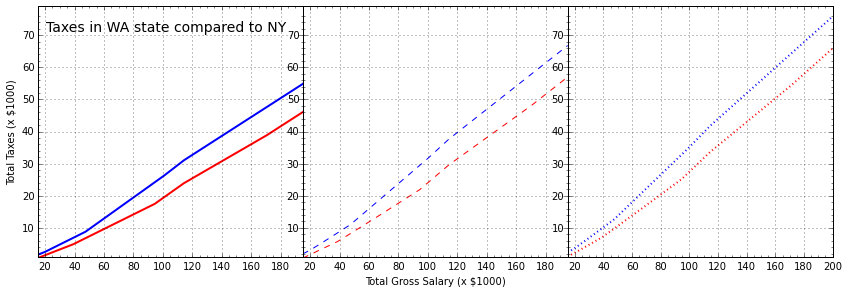

In [6]:
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(top=0.97, right=0.97, left=0.05, bottom=0.1, wspace=0)
ax = plt.subplot(133)
ax.plot(salaries, taxes_single_nyc, color="b", linestyle=":", linewidth=2)
ax.plot(salaries, taxes_married_nyc, color="r", linestyle=":", linewidth=2)
ax.set_ylim(1,79)
ax.set_xticks(np.arange(20,220,20))
ax.set_xlim(15)
ax.minorticks_on()
ax.grid()

ax = plt.subplot(132)
ax.plot(salaries, taxes_single_nys, color="b", linestyle="--")
ax.plot(salaries, taxes_married_nys, color="r", linestyle="--")
ax.set_xlabel("Total Gross Salary (x $1000)")
ax.set_ylim(1,79)
ax.set_xticks(np.arange(20,220,20))
ax.set_xlim(15, 195)
ax.minorticks_on()
ax.grid()

ax = plt.subplot(131)
ax.plot(salaries, taxes_single, color="b", linewidth="2")
ax.plot(salaries, taxes_married, color="r", linewidth="2")
ax.text(0.03,0.9,"Taxes in WA state compared to NY",transform=ax.transAxes, fontsize=14)
ax.set_ylabel("Total Taxes (x $1000)")
ax.set_ylim(1,79)
ax.set_xlim(salaries[0], salaries[-1])
ax.set_xticks(np.arange(20,220,20))
ax.set_xlim(15, 195)
ax.minorticks_on()
ax.grid()

# ax.legend(("Single in WA","Single in NY","Single in NYC","Married in WA","Married in NY","Married in NYC"), loc=4)
plt.savefig("taxes_WANY.jpg")
plt.show()

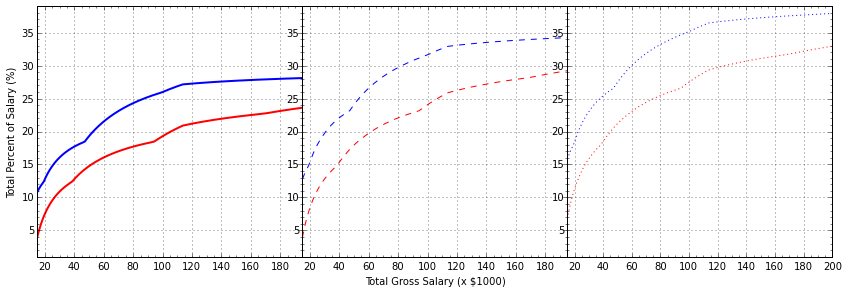

In [7]:
## Taxes as fraction of salary
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(top=0.97, right=0.97, left=0.05, bottom=0.1, wspace=0)
ax = plt.subplot(133)
ax.plot(salaries, taxes_single_nyc/salaries * 100, color="b", linestyle=":")
ax.plot(salaries, taxes_married_nyc/salaries * 100, color="r", linestyle=":")
ax.set_xticks(np.arange(20,220,20))
ax.set_xlim(15, salaries[-1])
ax.set_ylim(1,39)
ax.minorticks_on()
ax.grid()

ax = plt.subplot(132)
ax.plot(salaries, taxes_single_nys/salaries * 100, color="b", linestyle="--")
ax.plot(salaries, taxes_married_nys/salaries * 100, color="r", linestyle="--")
ax.set_xticks(np.arange(20,220,20))
ax.set_xlim(15, 195)
ax.set_ylim(1,39)
ax.set_xlabel("Total Gross Salary (x $1000)")
ax.minorticks_on()
ax.grid()

ax = plt.subplot(131)
ax.plot(salaries, taxes_single/salaries * 100, color="b", linewidth="2")
ax.plot(salaries, taxes_married/salaries * 100, color="r", linewidth="2")
ax.set_ylabel("Total Percent of Salary (%)")
ax.set_xticks(np.arange(20,220,20))
ax.set_xlim(15, 195)
ax.set_ylim(1,39)
ax.minorticks_on()
ax.grid()

# ax.legend(("Single in WA","Single in NY","Single in NYC","Married in WA","Married in NY","Married in NYC"), loc=4)
plt.savefig("taxes_WANY_prct.jpg")
plt.show()

In [8]:
diff = taxes_single - taxes_married
diff_prct = (taxes_single/salaries * 100) - (taxes_married/salaries * 100)

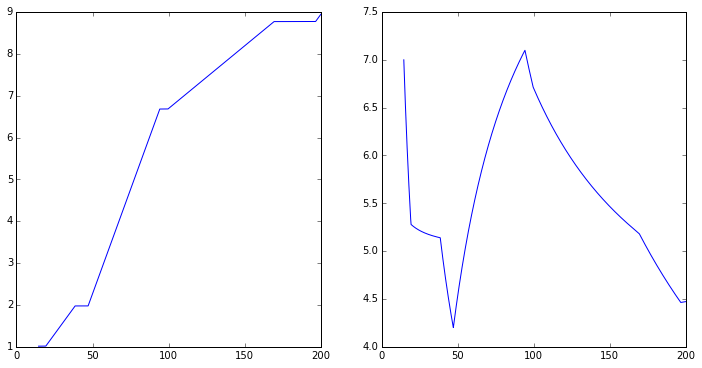

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(salaries, diff)

plt.subplot(122)
plt.plot(salaries, diff_prct)

plt.show()

In [10]:
salaries[np.where(diff_prct == max(diff_prct))]

array([ 94.08745875])

In [11]:
print federal_taxes(1081.80*24)

3904.4148


In [12]:
1081.80*24

25963.199999999997

In [13]:
federal_taxes(200000, status="single")

56458.15

In [14]:
print federal_taxes(50000), nystate_taxes(50000), nycity_taxes(50000), federal_taxes(50000) + nystate_taxes(50000) + nycity_taxes(50000)

9643.75 2391.775 1705.75 13741.275


### The Financial Life of Mr. Johnny Averageface

Salary: \$50K

Annual Expenses
<ul>
<li>Rent: \$15,600 (\$1,300 per month)</li>
<li>Food: \$7,500 (\$150 per week)</li>
<li>Credit Card Payment: \$3,750 (\$312.50 per month)</li>
<li>Student Loan Payment: \$4,143 (\$345.24 per month)</li>
<li>Funtimes: \$3,600 (\$300 per month)</li>
</ul>

Sources: 
<ul>
<li>http://www.nerdwallet.com/blog/credit-card-data/average-credit-card-debt-household/</li>
<li>http://www.finaid.org/calculators/loanpayments.phtml</li>
</ul>

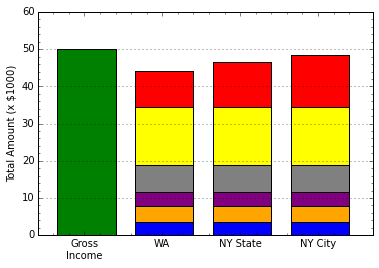

In [15]:
salary = 50.*1E3

rent = 1300*12
food = 150*50

taxes = federal_taxes(salary)
taxes_nys = federal_taxes(salary) + nystate_taxes(salary)
taxes_nyc = federal_taxes(salary) + nystate_taxes(salary) + nycity_taxes(salary)

expenses_1 = np.array([taxes, rent, food, 3750, 4143, 3600])/1.E3
expenses_2 = np.array([taxes_nys, rent, food, 3750, 4143, 3600])/1.E3
expenses_3 = np.array([taxes_nyc, rent, food, 3750, 4143, 3600])/1.E3

w = 0.75
inds = [1. + w/3]*len(expenses_1)

plt.bar(w/3, salary/1E3, width=w, color="g")

plt.bar(inds[0], expenses_1[-1], width=w, color="b")
plt.bar(inds[0]+1, expenses_2[-1], width=w, color="b")
plt.bar(inds[0]+2, expenses_3[-1], width=w, color="b")

colors = ["blue","orange","purple","gray","yellow","r"]

for ii in range(1,len(inds)):
    yind = -(ii+1)
    plt.bar(inds[ii], expenses_1[yind], bottom=sum(expenses_1[yind+1:]), width=w, color=colors[ii])
    plt.bar(inds[ii]+1, expenses_2[yind], bottom=sum(expenses_2[yind+1:]), width=w, color=colors[ii])
    plt.bar(inds[ii]+2, expenses_3[yind], bottom=sum(expenses_3[yind+1:]), width=w, color=colors[ii])

# plt.legend(["A", "B", "C", "D", "E", "F"])

ylines = np.arange(0,100+10,10)
for ii in range(10):
    plt.plot([0,100],[ylines[ii],ylines[ii]],color='k',linestyle=":",alpha=0.5)

plt.xlim(0,4.3)
plt.ylim(0,salary/1E3 + 10)
plt.minorticks_on()
plt.ylabel("Total Amount (x $1000)")

plt.xticks([w/3+0.35, inds[0]+0.35, inds[0]+1+0.35, inds[0]+2+0.35],["Gross\nIncome", "WA", "NY State", "NY City"])
plt.savefig("income_expenses_compare.png")
plt.show()

In [16]:
# print federal_taxes(80000, status="married") + nystate_taxes(80000, status="married") + nycity_taxes(80000, status="married")
print federal_taxes(50000, status="single") + nystate_taxes(50000, status="single") + nycity_taxes(50000, status="single")

13741.275


In [18]:
federal_taxes((1081*2 + 1600)*12)/12., 1081*2 + 1600

197.8166666666667

In [19]:
1600-197.82

1402.18

In [5]:
federal_taxes(30928.90 + (400.04*5 + 388.10), status="single")

5570.0958

In [7]:
federal_taxes(30928.90, status="single", ira=1200)

4849.14585